In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Model definition

In [ ]:
class Model(nn.Module):
  #input layer
  def __init__(self,in_features = 6,h1=8,h2=8, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x,activation_func):
    x = activation_func(self.fc1(x))
    x = activation_func(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(40)

#Reading data

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
df = pd.read_csv(url)
df.dropna(inplace=True)
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


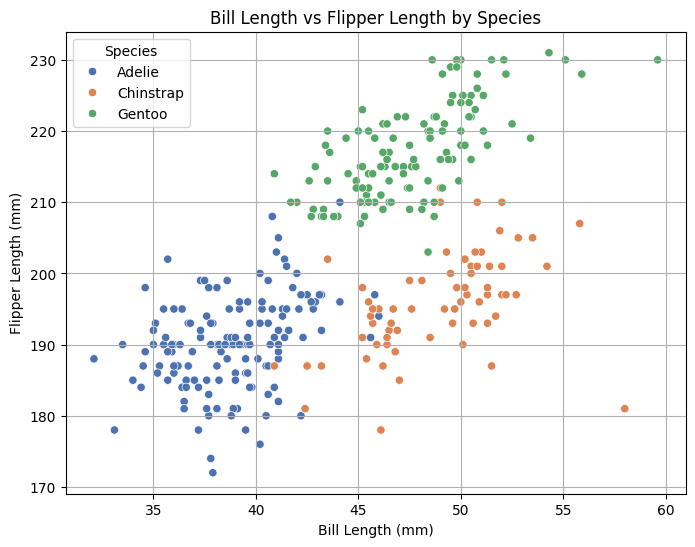

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='species', palette='deep')

plt.title('Bill Length vs Flipper Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

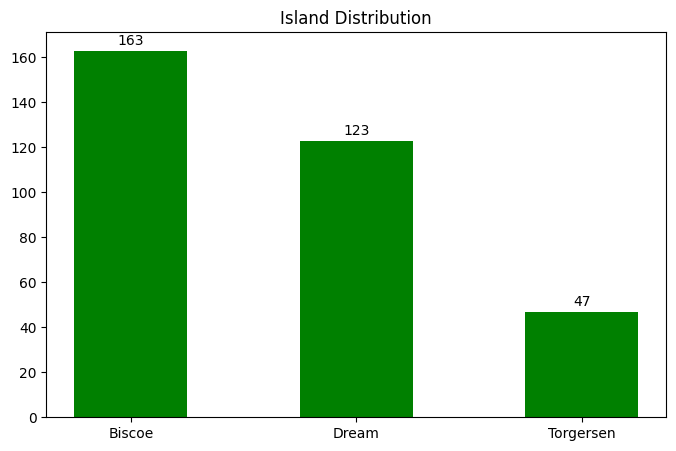

In [ ]:
island = df.island.value_counts()
plt.figure(figsize=(8,5))
plt.title("Island Distribution")
ax = plt.bar(x=island.index,height=island.values,width=0.5,color='green')
for p in ax.patches:
  plt.annotate(p.get_height(),(p.get_x()+0.25,p.get_height()+1),ha='center',va='bottom')
plt.show()

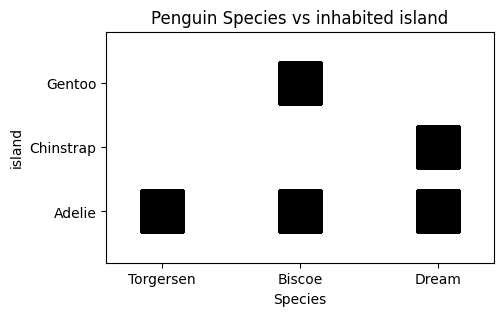

In [ ]:
x = df['island']
y = df['species']

plt.figure(figsize=(5, 3))
plt.title("Penguin Species vs inhabited island")
plt.xlabel("Species")
plt.ylabel("island")
plt.margins(x=0.2, y=0.4)

plt.plot(x, y, 'ks', markersize=30)

plt.show()

In [ ]:

males  = df.loc[df["sex"] == "MALE"]
females = df.loc[df["sex"] == "FEMALE"]
ticks = ['Adelie', 'Chinstrap', 'Gentoo']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='white', linewidth=1.5)

    # Fill boxes with color - using patch_artist
    for patch in bp['boxes']:
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

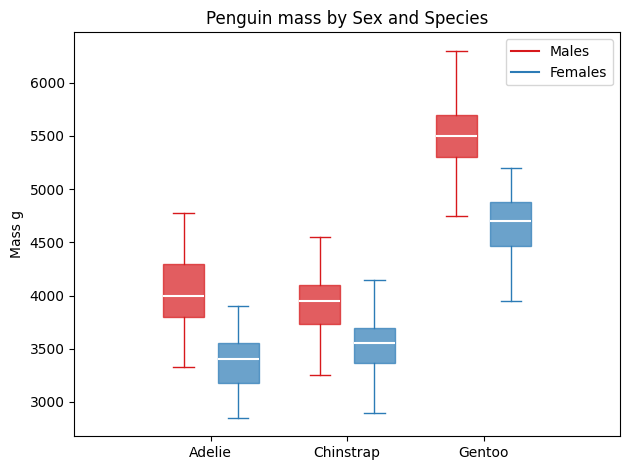

In [ ]:
#@title Penguin mass by Sex and Species


#males
A_m = males.loc[males["species"] == "Adelie"]["body_mass_g"]
C_m = males.loc[males["species"] == "Chinstrap"]["body_mass_g"]
G_m = males.loc[males["species"] == "Gentoo"]["body_mass_g"]
#females
A_f = females.loc[females["species"] == "Adelie"]["body_mass_g"]
C_f = females.loc[females["species"] == "Chinstrap"]["body_mass_g"]
G_f = females.loc[females["species"] == "Gentoo"]["body_mass_g"]

males_data = [A_m, C_m, G_m]
females_data = [A_f, C_f, G_f]


# Add patch_artist=True to enable filling the boxes
bpl = plt.boxplot(males_data, positions=np.array(range(len(males_data)))*2.0-0.4, sym='', widths=0.6, patch_artist=True)
bpr = plt.boxplot(females_data, positions=np.array(range(len(females_data)))*2.0+0.4, sym='', widths=0.6, patch_artist=True)
set_box_color(bpl, '#D7191C')  # Red for males
set_box_color(bpr, '#2C7BB6')  # Blue for females

# Draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Males')
plt.plot([], c='#2C7BB6', label='Females')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.title('Penguin mass by Sex and Species')
plt.ylabel('Mass g')
plt.tight_layout()
plt.show()

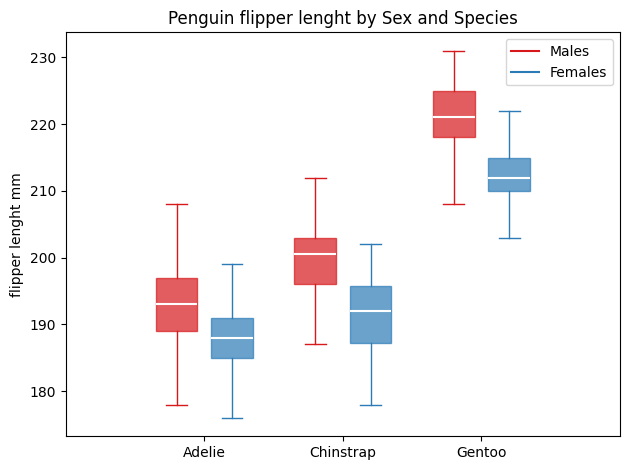

In [ ]:
#@title Penguin flipper lenght by Sex and Species


#males
A_m = males.loc[males["species"] == "Adelie"]["flipper_length_mm"]
C_m = males.loc[males["species"] == "Chinstrap"]["flipper_length_mm"]
G_m = males.loc[males["species"] == "Gentoo"]["flipper_length_mm"]
#females
A_f = females.loc[females["species"] == "Adelie"]["flipper_length_mm"]
C_f = females.loc[females["species"] == "Chinstrap"]["flipper_length_mm"]
G_f = females.loc[females["species"] == "Gentoo"]["flipper_length_mm"]

males_data = [A_m, C_m, G_m]
females_data = [A_f, C_f, G_f]


bpl = plt.boxplot(males_data, positions=np.array(range(len(males_data)))*2.0-0.4, sym='', widths=0.6, patch_artist=True)
bpr = plt.boxplot(females_data, positions=np.array(range(len(females_data)))*2.0+0.4, sym='', widths=0.6, patch_artist=True)
set_box_color(bpl, '#D7191C')  # Red for males
set_box_color(bpr, '#2C7BB6')  # Blue for females

# Draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Males')
plt.plot([], c='#2C7BB6', label='Females')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.title('Penguin flipper lenght by Sex and Species')
plt.ylabel('flipper lenght mm')
plt.tight_layout()
plt.show()

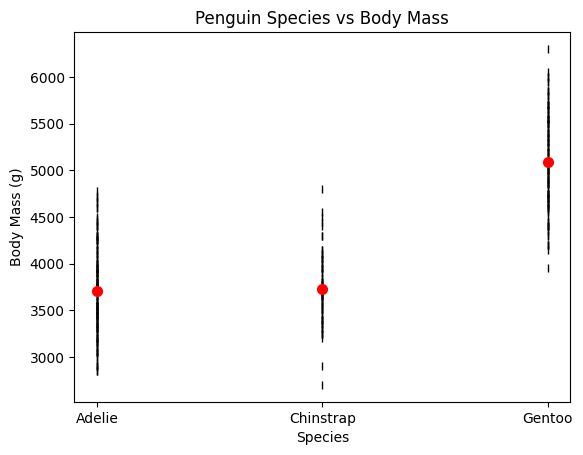

In [ ]:
x = df['species']
y = df['body_mass_g']

# Try using box plot for this comparison
# It is the exact tool for
plt.title("Penguin Species vs Body Mass")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.plot(x, y, 'k|')

average = df.groupby('species')['body_mass_g'].mean()
plt.plot(average.index, average.values, 'ro', ms = 7)
plt.show()

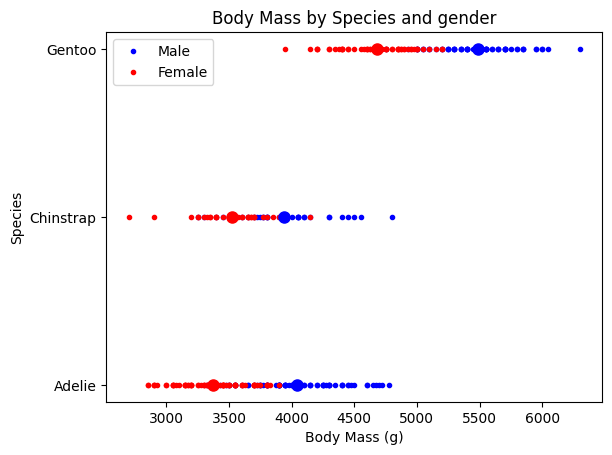

In [ ]:
x = df['species']
y = df['body_mass_g']

males = df[df['sex'] == 'MALE']
male_adelie = males[males['species'] == 'Adelie']
males_adelie_mean = male_adelie['body_mass_g'].mean()
male_chinstrap = males[males['species'] == 'Chinstrap']
males_chinstrap_mean = male_chinstrap['body_mass_g'].mean()
male_gentoo = males[males['species'] == 'Gentoo']
males_gentoo_mean = male_gentoo['body_mass_g'].mean()

females = df[df['sex'] == 'FEMALE']
female_adelie = females[females['species'] =='Adelie']
females_adelie_mean = female_adelie['body_mass_g'].mean()
female_chinstrap = females[females['species'] == 'Chinstrap']
females_chinstrap_mean = female_chinstrap['body_mass_g'].mean()
female_gentoo = females[females['species'] == 'Gentoo']
females_gentoo_mean = female_gentoo['body_mass_g'].mean()

plt.plot(male_adelie['body_mass_g'], male_adelie['species'], 'b.',)
plt.plot(female_adelie['body_mass_g'], female_adelie['species'], 'r.',)
plt.plot(male_chinstrap['body_mass_g'], male_chinstrap['species'], 'b.',)
plt.plot(female_chinstrap['body_mass_g'], female_chinstrap['species'], 'r.',)
plt.plot(male_gentoo['body_mass_g'], male_gentoo['species'], 'b.',)
plt.plot(female_gentoo['body_mass_g'], female_gentoo['species'], 'r.',)

plt.plot([males_adelie_mean, males_chinstrap_mean, males_gentoo_mean], [0, 1, 2], 'bo', ms = 8)
plt.plot([females_adelie_mean, females_chinstrap_mean, females_gentoo_mean], [0, 1, 2], 'ro', ms = 8)

labels = ['Male', 'Female']
plt.legend(labels)
plt.title('Body Mass by Species and gender')
plt.xlabel('Body Mass (g)')
plt.ylabel('Species')
plt.show()

## Normalization (min-max)
$$x' = \dfrac{x-min(x)}{max(x) - min(x)}$$


In [ ]:
df["species"] = df["species"].replace("Adelie",0.0)
df["species"] = df["species"].replace("Chinstrap",1.0)
df["species"] = df["species"].replace("Gentoo",2.0)

df["island"] = df["island"].replace("Torgersen",0.0)
df["island"] = df["island"].replace("Biscoe",1.0)
df["island"] = df["island"].replace("Dream",2.0)

df["sex"] = df["sex"].replace("MALE",0)
df["sex"] = df["sex"].replace("FEMALE",1.0)


def min_max_normalize_pandas(df, columns_to_normalize):
    """
    Min-max normalize selected columns using pandas methods.
    """
    df_normalized = df.copy()

    for column in columns_to_normalize:
        df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    return df_normalized


df = min_max_normalize_pandas(df,["bill_length_mm",	"bill_depth_mm", "flipper_length_mm",	"body_mass_g"])



<ipython-input-131-fb739fdc6592>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df["species"].replace("Gentoo",2.0)
<ipython-input-131-fb739fdc6592>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["island"] = df["island"].replace("Dream",2.0)
<ipython-input-131-fb739fdc6592>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

In [ ]:
X = df.drop("species", axis = 1)
y = df["species"]

X = X.values
y = y.values

#Dividing data into training and test data


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 40)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


#Implementing K-fold Cross Validation


([<matplotlib.patches.Wedge at 0x7983db868ad0>,
 [Text(-0.8899187390319623, 0.6465637152823859, 'train'),
  Text(0.8899186414035474, -0.6465638496563697, 'test')])

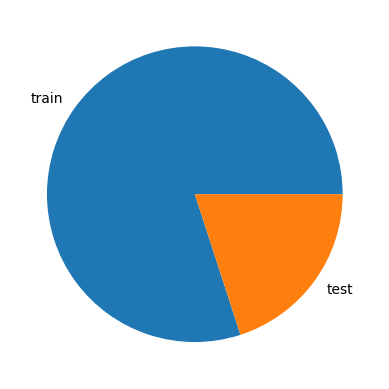

In [ ]:

labels = ["train","test"]
sizes = [80,20]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
#set the cirterion of model to measure the error

criterion = nn.CrossEntropyLoss()
model = Model()
optimizer = torch.optim.Adam(model.parameters(),lr=0.05)

#Training

In [ ]:
epochs = 20


activation_functions = [F.leaky_relu,F.relu,F.tanh,F.sigmoid,]
colors = ["red","blue","green","orange"]
losses_func = []

for foo in activation_functions:

  criterion = nn.CrossEntropyLoss()
  model = Model()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.05)
  losses = []
  losses_test = []
  correct_for_foo = [0 for _ in range(len(activation_functions))]
  #Train
  for i in range(epochs):
    #Measure the error
    y_pred = model.forward(X_train,foo)
    loss = criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    #print every 10 epochs
    #if i%10 == 0:
      #print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses_func.append(losses)

  #Test
  with torch.no_grad(): #turn off back propagation
    y_eval = model.forward(X_test,foo)
    loss_test = criterion(y_eval,y_test)
    losses
    print(f"{foo.__name__}: {loss_test.item():.4f}",end = " ")


  with torch.no_grad():
     for j,data in enumerate(X_test):
        y_val = model.forward(data,foo)
        #print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        if y_val.argmax().item() == y_test[j]:
          correct_for_foo[activation_functions.index(foo)] +=1

  print(f"correct:  {correct_for_foo[activation_functions.index(foo)]}/{len(y_test)}")





leaky_relu: 0.0642 correct:  67/67
relu: 0.1017 correct:  67/67
tanh: 0.0563 correct:  67/67
sigmoid: 0.6801 correct:  51/67


Text(0.5, 1.0, 'Error on Training')

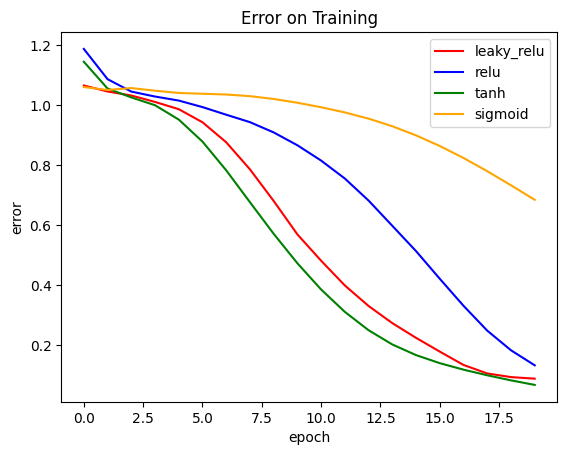

In [ ]:
for i in range(len(activation_functions)):
  plt.plot(range(epochs),losses_func[i],color = colors[i],label = activation_functions[i].__name__)


plt.ylabel("error")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.title("Error on Training")


In [ ]:
# y = species X = [island,	bill_length_mm,	bill_depth_mm,	flipper_length_mm,	body_mass_g	sex,]
# y= 0.0 /	X = [0.0,	39.1,	18.7,	181.0,	3.75,	0.00]
test_penguin1 = torch.tensor([[0.0,	39.1,	18.7,	181.0,	3.75,	0.00]])

with torch.no_grad():
    pred = model.forward(test_penguin1,F.relu)

print(pred)
print(pred.argmax().item())


# 2.0	1.0	46.8	14.3	215.0	4.850	1.0
test_penguin2 = torch.tensor([[1.0,	46.8,	14.3,	215.0,	4.850,	1.0]])

with torch.no_grad():
    pred = model.forward(test_penguin2,F.relu)

print(pred)
print(pred.argmax().item())

tensor([[-266.6666,   22.0893,  403.4211]])
2
tensor([[-327.1255,   27.1538,  495.0386]])
2


# KNN

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv'
df = pd.read_csv(url)
df.dropna(inplace=True)
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

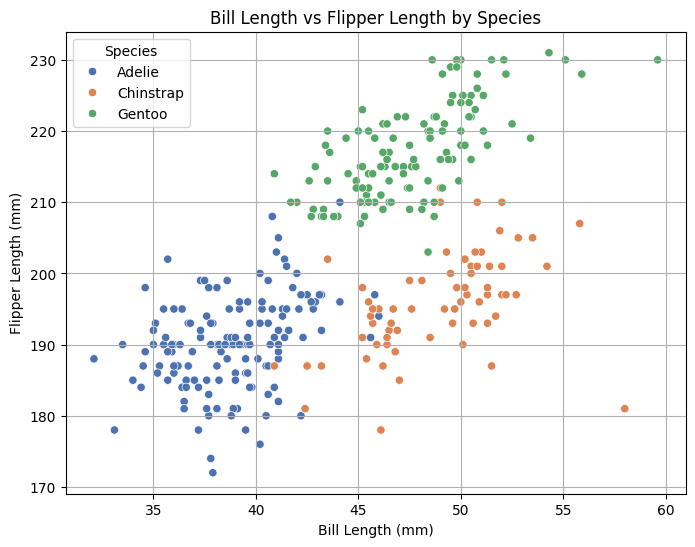

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='species', palette='deep')

plt.title('Bill Length vs Flipper Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

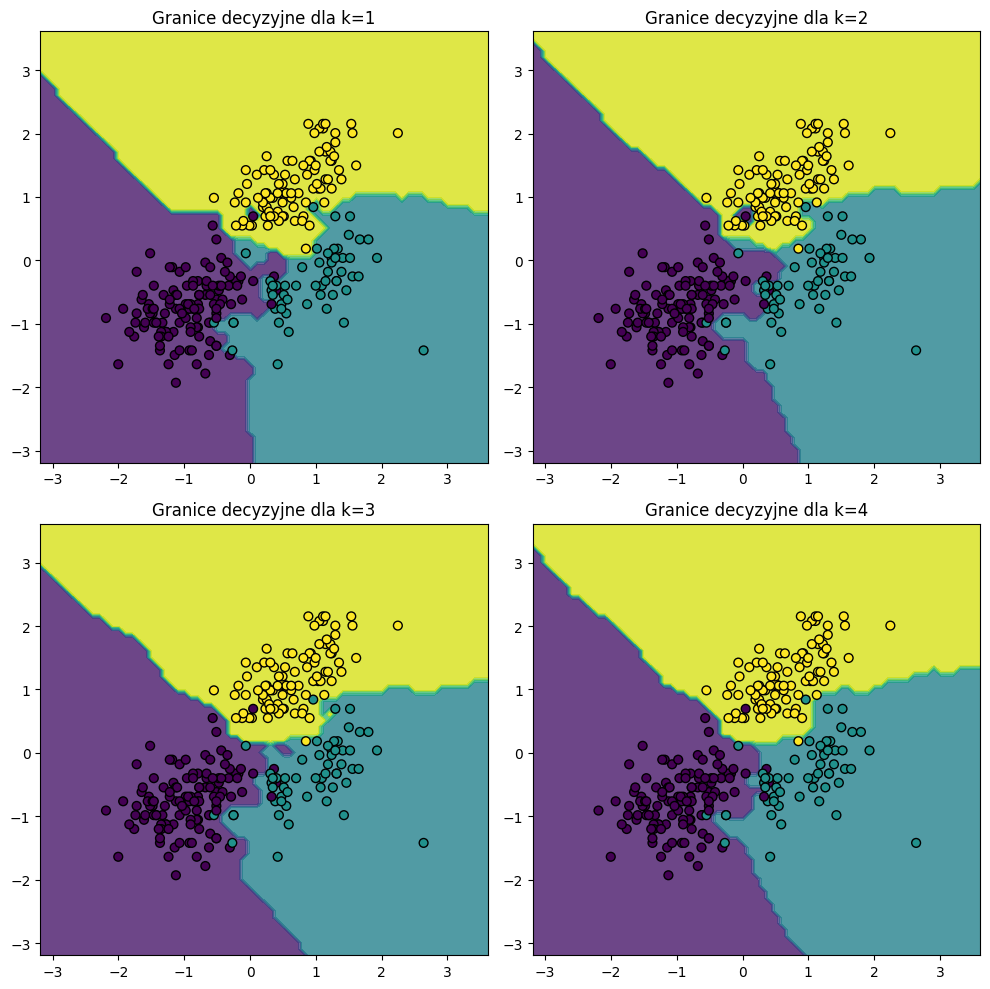

In [ ]:
df.head()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cechy do wizualizacji granic decyzyjnych
knnX = df[['bill_length_mm', 'flipper_length_mm']]

# target
knny = df['species']

# zmiana targetu na wartości numeryczne
label_encoder = LabelEncoder()
knny = label_encoder.fit_transform(knny)


# training split
knnX_train, knnX_test, knny_train, knny_test = train_test_split(knnX, knny, test_size=0.2, random_state=32)

# # skalowanie cech
scaler = StandardScaler()
knnX_train_scaled = scaler.fit_transform(knnX_train)
knnX_test_scaled = scaler.transform(knnX_test)

# lista do przechowania wyników
k_values = list(range(1,5))
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

# Granice decyzyjne - przygotowanie siatki
x_min, x_max = knnX_train_scaled[:,0].min() - 1, knnX_train_scaled[:,0].max() + 1
y_min, y_max = knnX_train_scaled[:,0].min() - 1, knnX_train_scaled[:,0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(10, 10))
for i, k in enumerate(k_values, start=1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(knnX_train_scaled, knny_train)

  knny_pred = knn.predict(knnX_test_scaled)

  accuracy_scores.append(accuracy_score(knny_test, knny_pred))
  recall_scores.append(recall_score(knny_test, knny_pred, average='weighted'))
  precision_scores.append(precision_score(knny_test, knny_pred, average='weighted'))
  f1_scores.append(f1_score(knny_test, knny_pred, average='weighted'))

  # Wizualizacja granic decyzyjnych
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.subplot(2, 2, i)
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(knnX_train_scaled[:, 0], knnX_train_scaled[:, 1], c=knny_train, edgecolors='k', marker='o', s=40)
  plt.title(f'Granice decyzyjne dla k={k}')



plt.tight_layout()
plt.show()

Najlepsza wartość k: 1


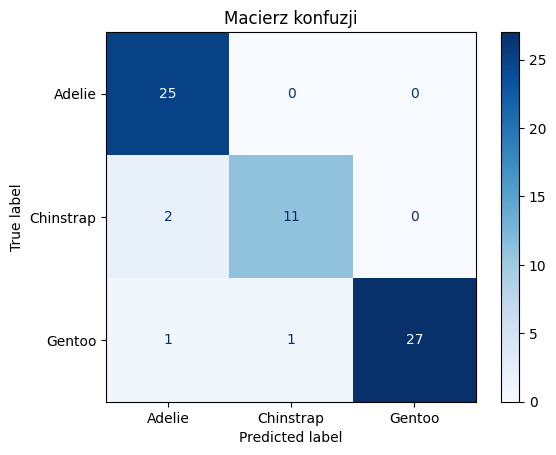

Dokładność: 0.9402985074626866
Macierz konfuzji:
 [[25  0  0]
 [ 2 11  0]
 [ 1  1 27]]
Raport klasyfikacji:
               precision    recall  f1-score   support

      Adelie       0.89      1.00      0.94        25
   Chinstrap       0.92      0.85      0.88        13
      Gentoo       1.00      0.93      0.96        29

    accuracy                           0.94        67
   macro avg       0.94      0.93      0.93        67
weighted avg       0.94      0.94      0.94        67



In [ ]:
# wybór najlepszego modelu na podstawie F1-score
best_k = k_values[np.argmax(max(f1_scores))]
print(f"Najlepsza wartość k: {best_k}")

# trenowanie najlepszego modelu
best_knn = KNeighborsClassifier(n_neighbors=best_k)

best_knn.fit(knnX_train_scaled, knny_train)

knny_pred_best = best_knn.predict(knnX_test_scaled)

# Rysowanie macierzy konfuzji
cm = confusion_matrix(knny_test, knny_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Macierz konfuzji')
plt.show()

# wyniki najlepszego modelu
print("Dokładność:", accuracy_score(knny_test, knny_pred_best))
print("Macierz konfuzji:\n", confusion_matrix(knny_test, knny_pred_best))
print("Raport klasyfikacji:\n", classification_report(knny_test, knny_pred_best, target_names=label_encoder.classes_))


In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# We'll use the same features as before
X = df[['bill_length_mm', 'flipper_length_mm']]
y = df['species']

# Create a pipeline: StandardScaler + KNN
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# fold cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Średnia dokładność (mean):", scores.mean())
print("Odchylenie standardowe (std):", scores.std())


Cross-validation accuracy scores: [0.97058824 1.         0.97058824 1.         0.93939394 0.96969697
 0.96969697 0.93939394 0.93939394 0.96969697]
Średnia dokładność (mean): 0.9668449197860962
Odchylenie standardowe (std): 0.021240562726820685


# corr matrix

<ipython-input-146-313b45a707bf>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_matrix_df = corr_matrix_df.replace({True : 1.0, False : 0.0})


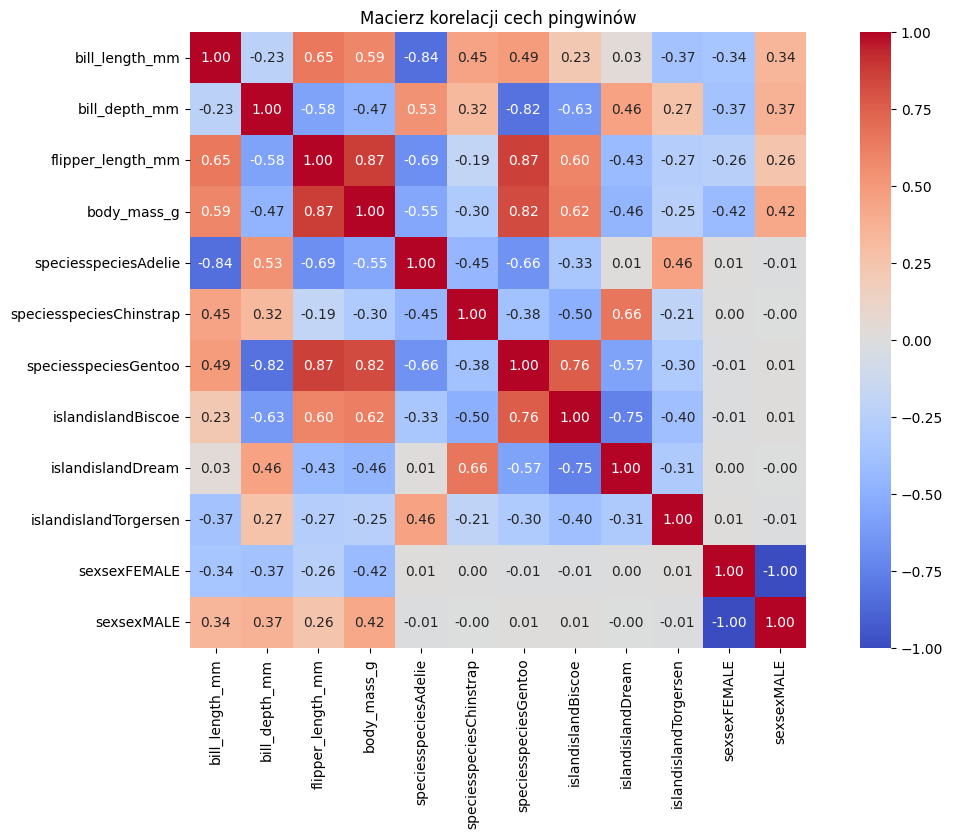

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# label_encoder = LabelEncoder()
# df['species'] = label_encoder.fit_transform(df['species'])

columns_to_encode = [ 'species', 'island', 'sex']


# one-hot encode
corr_matrix_df = pd.get_dummies(df, columns=columns_to_encode, prefix_sep={'species': 'species', 'island': 'island', 'sex': 'sex'})
corr_matrix_df.head()


# type(corr_matrix_df[islandislandBiscoe])


corr_matrix_df = corr_matrix_df.replace({True : 1.0, False : 0.0})


# for column in corr_matrix_df:
#   if corr_matrix_df[column]:
#     corr_matrix_df[column] = corr_matrix_df[column].replace("True",1.0)
#   else:
#     corr_matrix_df[column] = corr_matrix_df[column].replace("False",0.0)

corr_matrix_df.head()

# prefix_sep={'species': 'species', 'island': 'island', 'sex': 'sex'}

# Wybieramy tylko kolumny numeryczne (float, int) do korelacji
corr_matrix_df = corr_matrix_df.select_dtypes(include=['float64', 'int64'])

# Obliczanie macierzy korelacji
corr_matrix = corr_matrix_df.corr()


# Rysowanie wykresu
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Macierz korelacji cech pingwinów')
plt.show()
